In [1]:
!pip install tensorflow_text

     |████████████████████████████████| 2.6MB 2.8MB/s 


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/Corona_NLP_train.csv', encoding="latin-1")
df_test = pd.read_csv('/content/Corona_NLP_test.csv')

In [5]:
df.head(20)


UserName  ...           Sentiment
0       3799  ...             Neutral
1       3800  ...            Positive
2       3801  ...            Positive
3       3802  ...            Positive
4       3803  ...  Extremely Negative
5       3804  ...            Positive
6       3805  ...            Positive
7       3806  ...             Neutral
8       3807  ...            Positive
9       3808  ...            Negative
10      3809  ...             Neutral
11      3810  ...  Extremely Positive
12      3811  ...  Extremely Positive
13      3812  ...            Positive
14      3813  ...            Positive
15      3814  ...            Positive
16      3815  ...             Neutral
17      3816  ...             Neutral
18      3817  ...  Extremely Positive
19      3818  ...            Positive

[20 rows x 6 columns]

In [6]:
df.tail()

UserName  ...           Sentiment
41152     44951  ...             Neutral
41153     44952  ...  Extremely Negative
41154     44953  ...            Positive
41155     44954  ...             Neutral
41156     44955  ...            Negative

[5 rows x 6 columns]

In [7]:
df.shape

(41157, 6)

In [8]:
df_test.shape

(3798, 6)

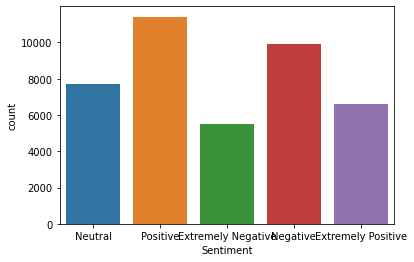

In [9]:
sns.countplot(df.Sentiment)

In [10]:
# good_tweets = df[df.Sentiment == "Positive"]] or df[df.Sentiment == "Extremely Positive"]]
# bad_tweets = df[df.Sentiment == "Negative" or df.Sentiment == "Extremely Negative"

In [11]:
df.dropna(inplace=True)

In [12]:
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [14]:
sid = SentimentIntensityAnalyzer()

In [15]:
df['scores'] = df['OriginalTweet'].apply(lambda tweet:sid.polarity_scores(tweet))

In [16]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [61]:
df['OriginalTweet'][2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'

In [62]:
df['Sentiment'][2]

'Positive'

In [24]:
positive_tweets = df[df.Sentiment == 'Positive']

In [25]:
positive_tweets.head(10)

UserName  ...  compound
1       3800  ...    0.2500
2       3801  ...    0.4588
5       3804  ...    0.4939
6       3805  ...    0.4215
8       3807  ...    0.4738
13      3812  ...    0.3400
15      3814  ...    0.1901
19      3818  ...    0.2892
36      3835  ...    0.4019
37      3836  ...    0.2732

[10 rows x 8 columns]

In [26]:
positive_tweets_text = " ".join(positive_tweets.OriginalTweet.to_numpy().tolist())

In [27]:
positive_tweets_text

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process onli

In [31]:
positive_tweets_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_tweets_text)

In [33]:
positive_tweets_cloud

In [34]:
def show_word_cloud(cloud):
  plt.figure(figsize=(16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show

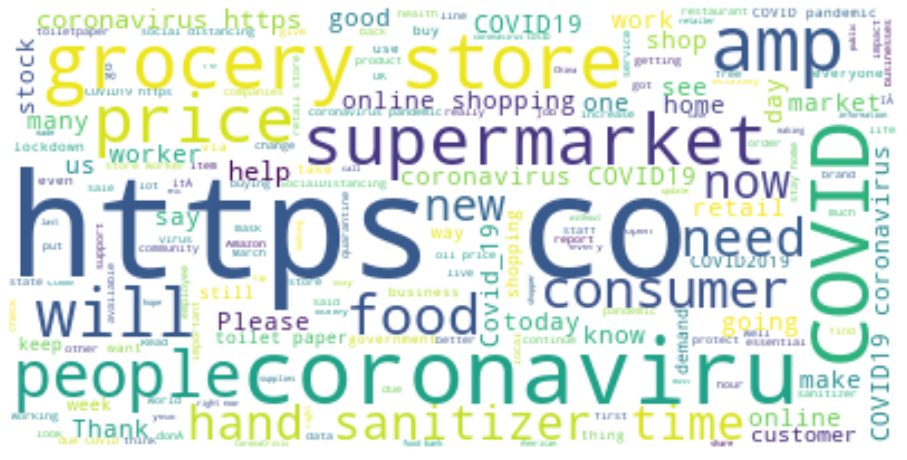

In [35]:
show_word_cloud(positive_tweets_cloud)

In [66]:
all_positive_tweets = df[(df.Sentiment == 'Postive') | (df.Sentiment == 'Extremely Positive')]

In [67]:
all_negative_tweets = df[(df.Sentiment == 'Negative') | (df.Sentiment == 'Extremely Negative')]

In [68]:
all_positive_tweets.tail(50)

UserName  ...  compound
40755     44554  ...    0.6597
40770     44569  ...    0.6025
40785     44584  ...    0.8316
40799     44598  ...    0.3612
40801     44600  ...    0.6841
40812     44611  ...    0.8043
40826     44625  ...    0.8706
40838     44637  ...    0.7003
40852     44651  ...    0.6808
40856     44655  ...    0.3818
40863     44662  ...    0.8555
40864     44663  ...    0.8573
40872     44671  ...    0.6946
40881     44680  ...    0.6705
40887     44686  ...    0.8316
40888     44687  ...    0.6249
40889     44688  ...    0.6908
40897     44696  ...    0.6900
40899     44698  ...    0.7430
40913     44712  ...    0.9062
40917     44716  ...    0.7269
40927     44726  ...    0.7351
40930     44729  ...    0.8860
40935     44734  ...    0.6705
40939     44738  ...    0.7096
40944     44743  ...    0.6486
40954     44753  ...    0.6808
40956     44755  ...    0.7906
40977     44776  ...    0.6249
40982     44781  ...    0.6249
40987     44786  ...    0.7579
40991     44790  ...    0.4840
41008     44807  ...    0.7430
41025     44824  ...    0.6369
41027     44826  ...    0.7906
41032     44831  ...    0.7351
41047     44846  ...    0.6476
41051     44850  ...    0.7622
41053     44852  ...    0.8020
41056     44855  ...    0.8034
41066     44865  ...    0.6808
41070     44869  ...    0.7425
41072     44871  ...    0.7906
41092     44891  ...    0.6867
41099     44898  ...    0.5106
41104     44903  ...    0.6124
41114     44913  ...    0.7096
41137     44936  ...    0.7096
41138     44937  ...    0.6892
41142     44941  ...    0.7184

[50 rows x 8 columns]

In [69]:
negative_tweets_text = " ".join(all_negative_tweets.OriginalTweet.to_numpy().tolist())

In [70]:
negative_tweets_text

'For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It\'s time to fight against COVID 19?. #govindia #IndiaFightsCorona with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale @10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn This morning I test

In [71]:
# positive_tweets_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_tweets_text)

def generate_cloud(text):
  cloud_text = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  show_word_cloud(cloud_text)

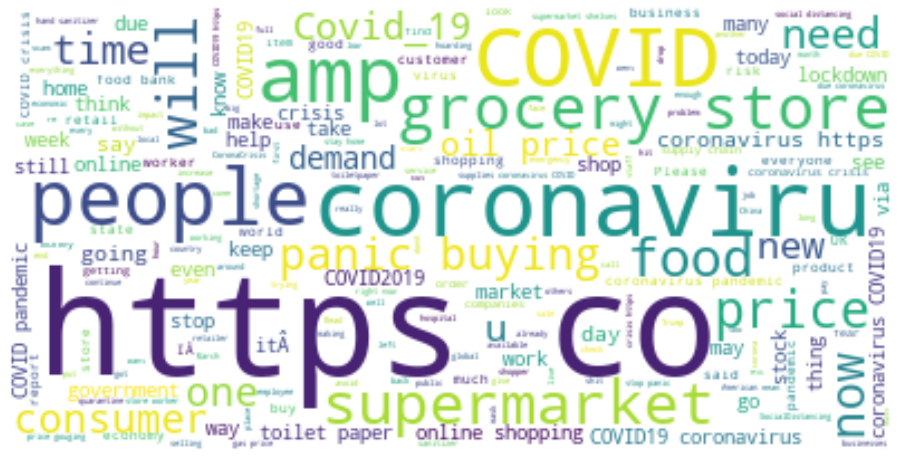

In [72]:
generate_cloud(negative_tweets_text)

In [74]:
all_negative_tweets

UserName  ...  compound
9          3808  ...   -0.5859
20         3819  ...   -0.6806
24         3823  ...   -0.5267
26         3825  ...   -0.5423
27         3826  ...   -0.8708
...         ...  ...       ...
41131     44930  ...   -0.1531
41133     44932  ...   -0.7269
41147     44946  ...   -0.5351
41149     44948  ...   -0.2500
41156     44955  ...   -0.4576

[12012 rows x 8 columns]